### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# 2. Estratégia de controle ótimo para diminuir espalhamento de fake news em mídia social [C				 #

#### Julia Vaisburd Xexéo  (julia.xexeo@poli.ufrj.br), Ney Rafael Guindane da Silva Barbosa (ney.barbosa@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático](#2.-Modelo Mathemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
1. [Conclusão](#5.-Conclusão)

## 1. Introdução ##

Nos últimos anos, com o advento das redes sociais e sua disseminação, o espalhamento de fake news, notícias falsas, aumentou e foi potencializado pela rapidez desses novos meios de comunicação. Eventos como as eleições americanas em 2016, Brasileiras em 2018 e a epidemia de Covid 19, foram marcados pelo alto número de noticias falsas disseminadas nas redes sociais.

O nosso projeto tem como objetivo buscar o controle ótimo e também um preditivo de um modelo de espalhamento de fake news nas redes sociais, proposto por   Muhlmeyer e Agarwal(2021,cap 15). 

No cenário que estamos considerando as noticias falsas são disseminadas não apenas em canais duvidosos, mas também em canais de noticias confiáveis da internet. Além disso, o governo está ciente que isso é uma possível ameaça e irá tomar medidas para converter e prevenir essa epidemia de falsas informações, antes que vire um pânico.

Por sorte, o governo tem acesso a modernas ferramentas de alerta e canais de distribuição direta de noticias, e é importante ressaltar que não importa para o governo se a noticia é realmente falsa ou verdadeira, apenas se ele quer diminuir ou aumentar o espalhamento da mesma. 

Levaremos em consideração que essa epidemia de informação começou antes do governo ficar ciente de seu perigo e assim parte da população já está espalhando as noticias e as recebendo.

O modelo de espalhamento de Fake News se assemelha a um modelo de pandemia, aonde há os infectados, que podem espalhar a doença, então no nosso caso serão chamados de espalhadores, que podem espalhar a notícia. Os não infectados, que no nosso caso serão chamados de ignorantes, que ainda podem se infectar e espalhar a notícia e os curados, que não se contaminam mais e assim não podem espalhar mais a notícia. 

No nosso modelo, não mostramos diretamente os curados, será algo implícito, o gráfico de população só terá espalhadores e ignorantes, então a diferença percentual para chegar a 100\% da população será o número de curados.   

Dessa forma , o objetivo do nosso controle será  impedir que as notícias falsas ganhem uma vida própria substancial dentro das redes sociais.

Assim, primeiramente a partir da perspectiva de controle sera definida a função objetiva e a estratégia de controle ótimo. Após a otimização dessa função, será introduzida restrições orçamentárias ao controle.
Depois, será proposto um modelo de controle em tempo real e estudaremos se os controles calculados são válidos na presença de incertezas.

## 2. Modelo matemático ##


Primeiramente temos as equações dinâmicas do problema , em que x\_1 é o número de ignorantes e x\_2 de espalhadores, o objetivo do controle é prevenir a fakenews de ser amplamente espalhada e assim, se uma porcentagem suficiente da população esta imunizada dessa noticia falsa, não ocorrerá um pandemia da notícia falsa.

Uma estratégia de imunização é a educação antes da noticia chegar ao ignorante, que funcionaria parecido com a vacinação, pois ao ser "vacinado" com a informação correta, o ignorante não espalhará a notícia falsa.

Com um baixo número de espalhadores e alto número de ignorantes educados, a noticia falsa não será amplamente divulgada. 

O número de ignorante e espalhadores no nosso sistema podem ser modelados pelas seguintes equações, em que $\beta$ e $\gamma$ são parâmetros utilizados nos sistemas epidemiológicos, representando a taxa de espalhamento e a taxa de diminuição, respectivamente. 

\begin{align*}
    &\dot{x_1}(t) = -\beta x_1(t)x_2(t) - b u(t) x_1(t)\\
    &\dot{x_2}(t) = \beta x_1(t)x_2(t) - \gamma x_2^2(t)
\end{align*}

$b u(t) x_1(t) $ é o nosso controle, que é a tentativa de reduzir o número de ignorantes por meio da educação. 

Para a formulação matemática teremos que discretizar a equação dinâmica, dessa forma obtendo as equações abaixo:

\begin{align*}
    &x\_1[k+1] =  x\_1[k] - \beta * x\_1[k] * x\_2[k] - b * u[k] * x\_1[k]\\
    &x\_2[k+1] = x\_2[k] + \beta * x\_1[k] * x\_2[k] - \gamma * x\_2[k] * x\_2[k]
\end{align*}

Além disso, teremos algumas restrições no sistema. Espalhadores, ignorantes e controle sempre positivos e soma dos espalhadores com ignorantes deverá ser menor que $\beta$ sobre $\gamma$

\begin{align*}
    &x\_1[k] \geq 0\\
    &x\_2[k] \geq 0\\
    &u[k] \geq 0\\
    &x\_1[k] + x\_2[k] \leq (\beta / \gamma)\\
\end{align*}

O valor inicial de $x_1 $e $x_2$ será definido de forma a soma inicial dele ser igual a 1, representando assim 100\% da população.

Por fim, teremos nossa função objetiva, em que desejamos chegar em um nível de imunização em um determinado tempo:

\begin{align*}
    J =\|{x_1(t) + x_2(t) - \frac{\gamma}{\beta}}\|^2
\end{align*}

Dessa forma, temos que a formulação do problema é:

$$
\begin{aligned}
\underset{x_1, x_2 \in \mathbb{R^n}}{\text{minimize}}\qquad&  \sum_{n=1}^{k} (x_1(k) + x_2(k) - \frac{\gamma}{\beta})^2 \\
\text{sujeito a:}\qquad& x_1[k], x_2[k], u[k] \geq 0\\
&x_1[k] + x_2[k] \leq (\gamma / \beta)\\
& x_1[k+1] = x_1[k] - \beta * x_1[k] * x_2[k] - b * u[k] * x_1[k]\\ 
& x_2[k+1] = x_2[k] + \beta * x_1[k] * x_2[k] - \gamma * x_2[k] * x_2[k]\\
\end{aligned}\\
$$

## 3. Solução ##



In [2]:
#DEFININDO PACOTES A SEREM UTILIZADOS
@time using Clp
@time using JuMP
@time using Plots
@time using Ipopt
@time using LinearAlgebra
@time using ImplicitEquations
@time using Mosek
@time using MosekTools
@time using Random

  0.001410 seconds (277 allocations: 18.609 KiB)
  0.000653 seconds (277 allocations: 18.609 KiB)
  0.000619 seconds (277 allocations: 18.609 KiB)
  0.000527 seconds (277 allocations: 18.609 KiB)
  0.001339 seconds (605 allocations: 46.422 KiB)
  0.000647 seconds (277 allocations: 18.625 KiB)
  0.000783 seconds (277 allocations: 18.609 KiB)
  0.000739 seconds (277 allocations: 18.609 KiB)
  0.000555 seconds (277 allocations: 18.609 KiB)


Começaremos o código definindo as nossas constantes, que serão utilizadas ao longo do trabalho.

A taxa de espalhamento  $\beta$  escolhida foi 0.5
e a taxa de diminuição  $\gamma$ como 0.3.

Consideraremos que a população inicial é formada apenas por ignorantes e espalhadores iniciais, e assim, inicialmente 70% da nossa população será ignorante e 30% espalhadores de fake news.

Além disso, a constante b, que multiplica nosso controle, será 1 para não ter impacto no valor de U.

In [3]:
#PARAMETROS

b = 1 
β= 0.5
γ = 0.3
k = 50
x_1_init = 0.7
x_2_init = 0.3
T = [ i for i=1:k ];


#### 3.1 controle ótimo no Horizonte [$1,k$] #####
Depois de definidas as constantes,será feito o cálculo do controle ótimo no Horizonte [$1,k$], em que k = 50.

In [46]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt1 = JuMP.value.(u[1:k-2])
x_1opt1 = JuMP.value.(x_1[1:k-2])
x_2opt1 = JuMP.value.(x_2[1:k-2])

println("x1 ignorantes:",x_1opt1)
println("x_2 spreaders",x_2opt1)
println("u",uopt1)

#cortar ultimo ponto

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      199
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       49

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráfico 1 ####

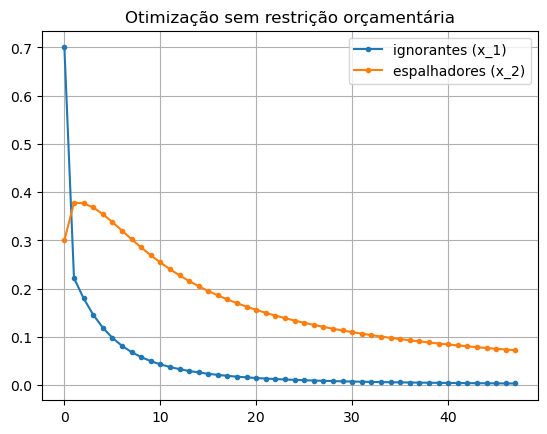

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [47]:
using PyPlot
PyPlot.svg(true)
PyPlot.title("Otimização sem restrição orçamentária")
PyPlot.plot([x_1opt1 x_2opt1],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()

#### Gráfico 2 ####


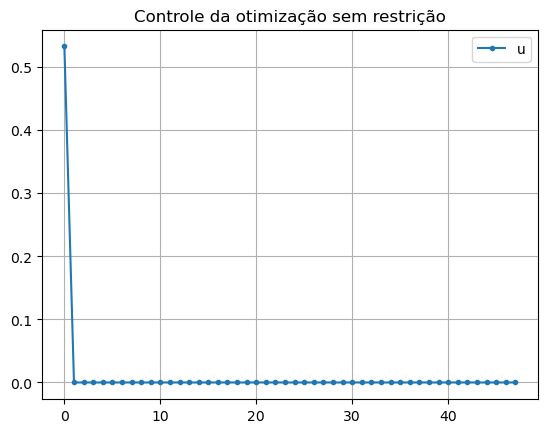

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [48]:
PyPlot.plot(uopt1,".-")
PyPlot.title("Controle da otimização sem restrição")
PyPlot.legend("u",loc="best")
PyPlot.grid()
PyPlot.figure()

#### 3.2 Otimização introduzindo restrições orçamentárias ao controle u ####

Agora, será introduzido um gasto máximo ao controle u, que sera u[k]<= 0.1, sendo mais uma restrição do nosso sistema.

$$
\begin{aligned}
\underset{x_1, x_2 \in \mathbb{R^n}}{\text{minimize}}\qquad&  \sum_{n=1}^{k} (x_1(k) + x_2(k) - \frac{\gamma}{\beta})^2 \\
\text{sujeito a:}\qquad& x_1[k], x_2[k], u[k] \geq 0\\
&x_1[k] + x_2[k] \leq (\gamma / \beta)\\
& x_1[k+1] = x_1[k] - \beta * x_1[k] * x_2[k] - b * u[k] * x_1[k]\\ 
& x_2[k+1] = x_2[k] + \beta * x_1[k] * x_2[k] - \gamma * x_2[k] * x_2[k]\\
& u[k] \leq 0.1\\
\end{aligned}\\
$$

In [52]:


#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k]-1 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
    @constraint(m, u[k] <= 0.1) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt2 = JuMP.value.(u[1:k-2])
x_1opt2 = JuMP.value.(x_1[1:k-2])
x_2opt2 = JuMP.value.(x_2[1:k-2])


println("x1 ignorantes:",x_1opt2)
println("x_2 spreaders",x_2opt2)
println("u",uopt2)



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      294
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      245
        inequality constraints with only lower bounds:      147
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       98

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Gráfico 3 ####

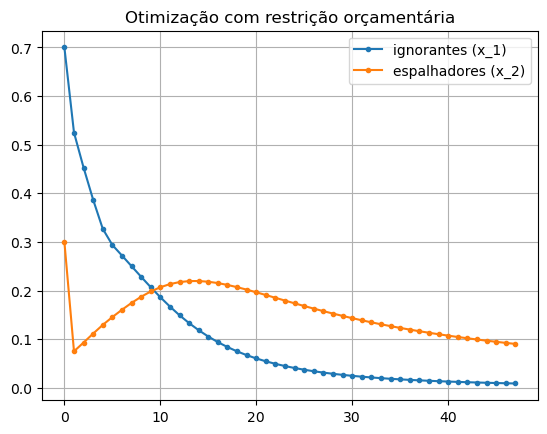

In [53]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2 x_2opt2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()


##### Gráfico 4 ####

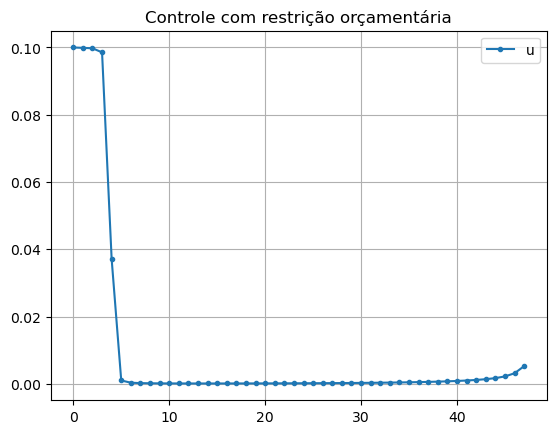

In [54]:
PyPlot.figure()
PyPlot.title("Controle com restrição orçamentária")
PyPlot.plot(uopt2,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

#### 3.3 Controle Preditivo ####
Agora, utilizaremos o controle preditivo, em que ocorre a realimentação. O sistema é cálculado no horizonte k, mas pegamos apenas a primeira resposta do controle e recalculamos o sistema com esse novo passo.

In [89]:

x1 = zeros(k)
x2 = zeros(k)
uu = zeros(k-1)

x1[1] = x_1_init
x2[1] = x_2_init

for k in 1:T[20]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, 0.001>= u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (γ / β)) 
    @NLconstraint(m, x_1 == x1[k] - β * x1[k] * x2[k] - b * u * x1[k])
    
    @NLconstraint(m, x_2 == x2[k] + β * x1[k] * x2[k] - γ * x2[k] * x2[k])
    #@constraint(m, u[k] <= 0.1) 
    @objective(m, Min, sum((x_1 + x_2 - (γ / β)).^2)) 
    
    optimize!(m)
    x1[k+1] = JuMP.value(x_1)
    x2[k+1] = JuMP.value(x_2)
    uu[k] = JuMP.value(u)
    
end


println("x1 ignorantes:",x1)
println("x_2 spreaders",x2)
println("u",uu)

#cortar ultimo ponto



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        1
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.3640002e-01 5.85e-01 1.01e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráficos 5 e 6 ####

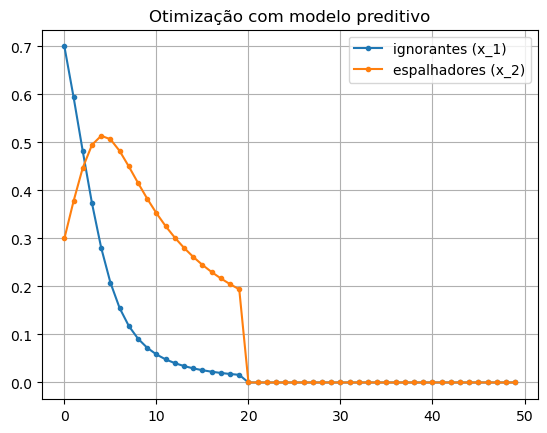

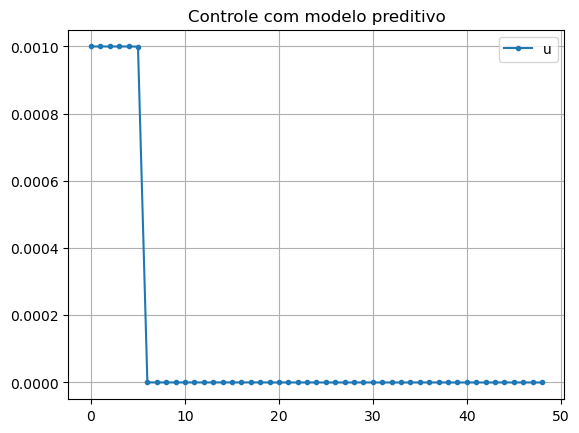

In [90]:

PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1 x2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Controle com modelo preditivo")
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

#### 3.4 Inserção de incertezas no modelo de controle ótimo ####

Utilizando incertezas no valor de $\beta$ e $\gamma$, calculamos o nosso controle ótimo em todo o horizonte k.


In [38]:
#PARAMETROS
rng = MersenneTwister(1234)

gama = rand!(rng, zeros(50))/2 
beta = rand!(rng, zeros(50))/2; #gerando incertezas


In [65]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (gama[k] / beta[k])) 
end
for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - beta[k] * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + beta[k] * x_1[k] * x_2[k] - gama[k] * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (gama[k] / beta[k])).^2)) 

optimize!(m)

uopt3 = JuMP.value.(u[1:48])
x_1opt3 = JuMP.value.(x_1[1:48])
x_2opt3 = JuMP.value.(x_2[1:48]);

#println("x1 ignorantes:",x_1opt)
#println("x_2 spreaders",x_2opt)
#println("u",uopt)

#cortar ultimo ponto

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      199
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       49

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.5373943e+00 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráficos 7 e 8 ####

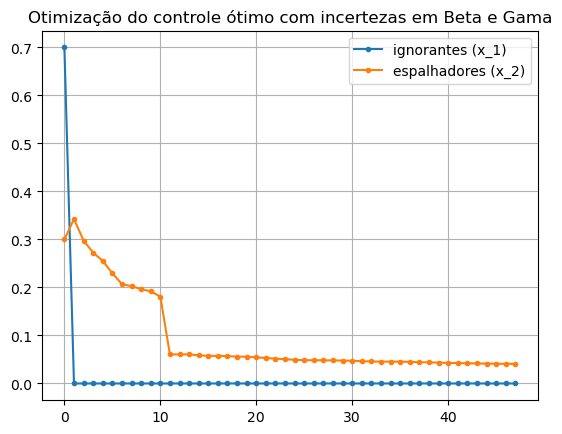

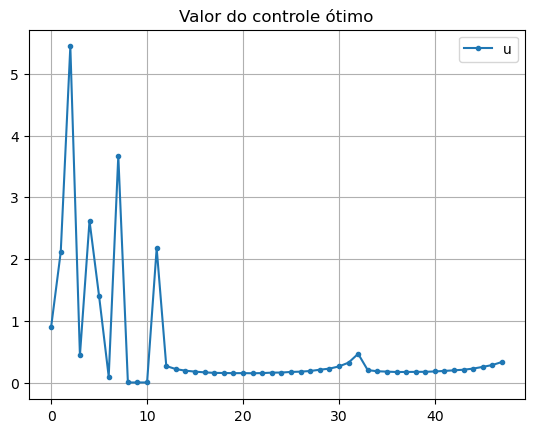

In [66]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle ótimo com incertezas em Beta e Gama")
PyPlot.plot([x_1opt3 x_2opt3],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Valor do controle ótimo")
PyPlot.plot(uopt3,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

#### 3.5 Inserção de incertezas no modelo de controle preditivo ####

Agora, colocaremos incertezas nos valores de $\beta$ e $\gamma$ e faremos a otimização com o controle preditivo.

In [76]:

x11 = zeros(k)
x21 = zeros(k)
uu1 = zeros(k-1)

x11[1] = x_1_init
x21[1] = x_2_init

for k in 1:T[10]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (gama[k] / beta[k])) 
    @NLconstraint(m, x_1 == x11[k] - beta[k] * x11[k] * x21[k] - b * u * x11[k])
    
    @NLconstraint(m, x_2 == x21[k] + beta[k] * x11[k] * x21[k] - gama[k] * x21[k] * x21[k])
    
    @objective(m, Min, sum((x_1 + x_2 - (gama[k] / beta[k])).^2)) 
    
    optimize!(m)
    x11[k+1] = JuMP.value(x_1)
    x21[k+1] = JuMP.value(x_2)
    uu1[k] = JuMP.value(u)
    
end
;

#println("x1 ignorantes:",x11)
#println("x_2 spreaders",x21)
#println("u",uu1)

#cortar ultimo ponto



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.6883029e-01 6.14e-01 1.15e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráficos 9 e 10 ####

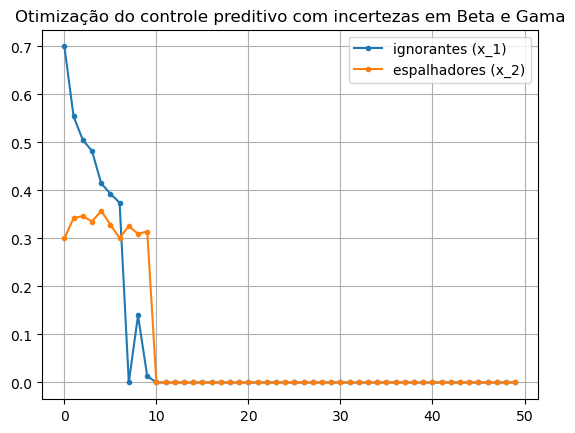

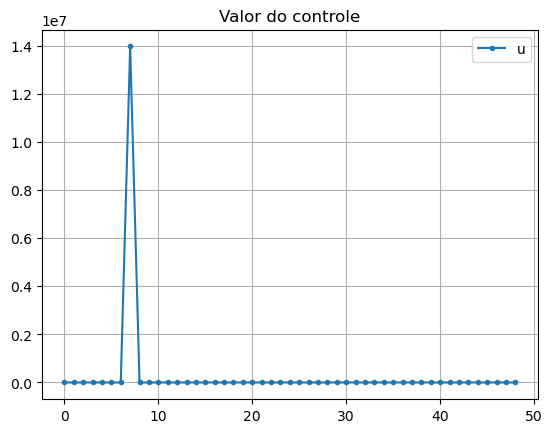

In [78]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle preditivo com incertezas em Beta e Gama")
PyPlot.plot([x11 x21],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Valor do controle")
PyPlot.plot(uu1,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

## 4. Resultados e Discussões ##

### 4.1 Controle ótimo sem restrição orçamentária ###
Após o desenvolvimento dos códigos acima é possível observar que ao montarmos o modelo de controle ótimo no horizonte k, sem restrições orçamentárias para o controle,  percebemos, observando o gráfico 1 e 2 que inicialmente a população de espalhadores aumenta e de ignorantes diminui, depois de um tempo, com o controle a população de espalhadores se estabiliza em um valor baixo, e o amplo espalhamento de notícias falsas deixa de ser um risco. Além disso, podemos ver quando não temos uma restrição de controle, o mesmo tem um pico inicial e o problema acaba sendo solucionado muito rápido.

Dessa forma, vemos que o controle ótimo do nosso sistema consegue solucionar o problema para os parâmetros determinados.

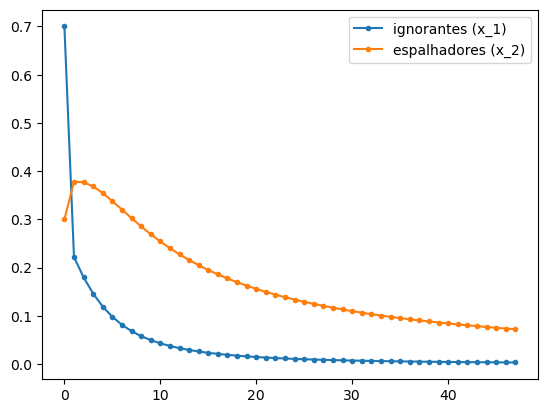

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [29]:

PyPlot.svg(true)
PyPlot.plot([x_1opt1 x_2opt1],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.figure()

### 4.2 Controle ótimo com restrição orçamentária ###
Na restrição orçamentária, nos gráficos 3 e 4, podemos ver que o decaimento da população ignorante é mais suave e o controle atinge o máximo estipulado pela restrição algumas vezes até chegar em um nível que deixa de ser necessário. Quando olhamos o número de espalhadores, vemos que ocorre um decaimento do número de espalhadores antes de subir, isso ocorre pois temos uma restrição em que a soma de espalhadores e de ingnorantes não pode ser maior que a razão $\beta$/$\gamma$. 

Comparando esse sistema com o sem restrição vemos que ele é muito mais devagar, mas ainda sim o nosso sistema consegue solucionar o problema.


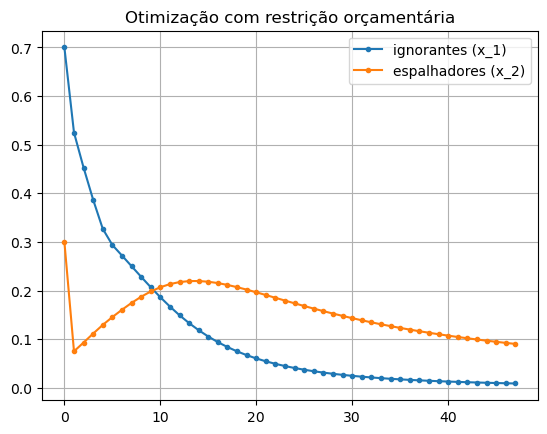

In [40]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2 x_2opt2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()


### 4.3 Controle preditivo ###
Quando utilizamos o controle preditivo o sistema deixa de ser um sistema em malha aberta para ser um sistema realimentado. O nosso controle preditivo é apenas um passo a frente, o que resultou em um grande salto dos espalhadores, porque como nosso sistema não sabe o que vai acontecer ele coloca um controle alto e mesmo assim os espalhadores aumentam.

Fizemos até a 10º interação pois o sistema estava travando quando colocávamos valores alto como 40 ou 50, mesmo assim podemos perceber pelo gráfico abaixo que tanto o número de ignorates quanto o de espalhadores estão diminuindo, demonstrando que o controle conseguiu impedir a pandemia de fake news acontecer.

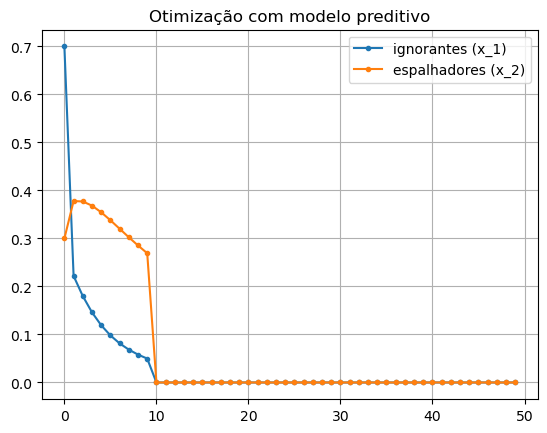

In [62]:
PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1 x2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()

#### 4.4 Inserção de incertezas no modelo de controle ótimo ####

Incluindo incerteza nos valores de $\beta$ e $\gamma$ no nosso modelo de controle ótimo percebemos um comportamente muito abrupto no número de espalhadores e ignorantes, isso se deve tanto ao fato de $\beta$ e $\gamma$ influenciarem diretamente nas retrições como o controle não ser limitado. 

O principal desse modelo é que o nosso controle consegue solucionar o problema mesmo com as incertezas nos valores.  

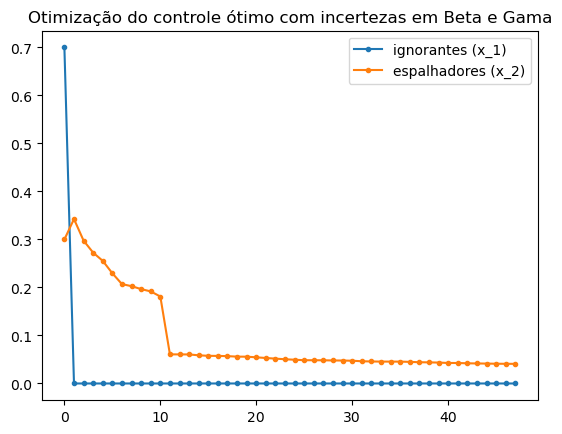

PyObject <matplotlib.legend.Legend object at 0x000000000172F3D0>

In [61]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle ótimo com incertezas em Beta e Gama")
PyPlot.plot([x_1opt3 x_2opt3],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")


#### 4.5 Inserção de incertezas no modelo de controle preditivo ####
A inclusão de incertezas no modelo preditivo não funciona tão bem quanto no com controle ótimo, na verdade, quando analisamos o gráfico de ignorantes e espalhadores vemos que ocorre uma subida no número de ignorantes, algo que não deveria aconteccer. Podemos entender a causa dessa falha no sistema devido a um pico no valor de controle, como pode ser observado no gráfico do valor de controle abaixo, em que o controle ganha o valor de 1.4*10^7 o que explica esse aumento no número de ignorantes.


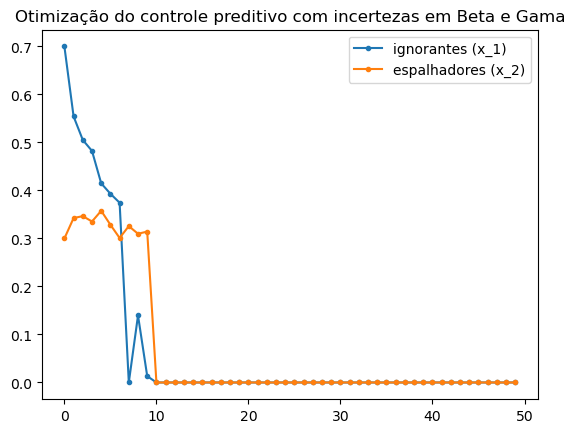

PyObject <matplotlib.legend.Legend object at 0x000000007B2DABB0>

In [75]:
PyPlot.svg(true)
PyPlot.title("Otimização do controle preditivo com incertezas em Beta e Gama")
PyPlot.plot([x11 x21],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")


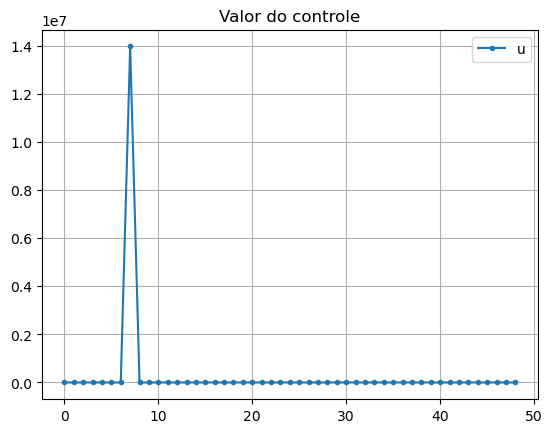

In [79]:
PyPlot.figure()
PyPlot.title("Valor do controle")
PyPlot.plot(uu1,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

## 5. Conclusão ##



## 6. Referências ##

MUHLMEY, Michael. AGARWAL,Shaurya. Information Spread in a Social Media Age: Modeling and Control. primeira edição. Boca Rato, FR: CRC PRESS, 2021.

BHAYA, Amit . Slides das aulas de Introdução a otimização, UFRJ, 2021.2
